# Sector Analysis Project 1

## Step 1 - Objectives

Get sector data from yahoo finance and place into df

this info includes historical close prices, historical open prices, volume for the day, VWAP if available, then we need to sort by the given variables.

Maybe look at % away from 52 week high, % from 50 Daily SMA, VWAP or Time Profile, volume patterns, BB

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

In [24]:
yf.pdr_override()
start = dt.datetime(2021, 1, 1)
now = dt.datetime.now()
sector_tickers = ('XRT', 'XLY', 'XLC', 'XLK', 'XLV')

In [25]:
df = pdr.get_data_yahoo(sector_tickers, start, now, interval = '1mo')
df.drop(['High', 'Low', 'Close'], axis = 1, inplace = True)
df.dropna(inplace = True)
df.tail()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                 \
                  XLC         XLK         XLV         XLY        XRT   
Date                                                                   
2021-03-01  73.190681  132.444153  116.336227  167.803436  89.056023   
2021-04-01  78.050003  139.699997  121.330002  178.919998  92.820000   
2021-05-01  78.790001  138.399994  123.599998  172.839996  93.360001   
2021-06-01  79.290001  140.100006  123.330002  171.460007  95.889999   
2021-06-10  79.511497  140.820007  125.120003  171.669998  94.709999   

                 Open                                                 \
                  XLC         XLK         XLV         XLY        XRT   
Date                                                                   
2021-03-01  72.519997  132.910004  113.529999  163.149994  80.690002   
2021-04-01  73.980003  134.259995  116.930000  169.589996  89.639999   
2021-05-01  78.360001  140.449997  121.989998  179.889999  93.720001   
2021-06-01  79.080002  139.020004  123.750000  173.869995  94.290001   
2021-06-10  79.370003  140.389999  123.629997  171.770004  96.139999   

                 Volume                                                     
                    XLC          XLK          XLV          XLY         XRT  
Date                                                                        
2021-03-01  122402700.0  262715800.0  235714900.0  121750600.0  77141700.0  
2021-04-01   75048000.0  118247700.0  147781700.0   62915500.0  39671400.0  
2021-05-01   89052800.0  167385100.0  193855600.0   88675000.0  54518500.0  
2021-06-01   23043100.0   38676900.0   83830300.0   25603300.0  17435200.0  
2021-06-10     964434.0    2497564.0    4128933.0    1322106.0   1451210.0

In [26]:
for i, name in df:
    df['Monthly Returns', name] = df['Adj Close', name].pct_change()
    df['Monthly Volume Delta', name] = df['Volume', name].pct_change()

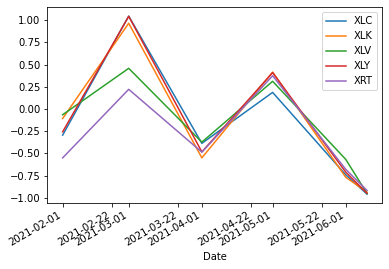

In [28]:
df['Monthly Volume Delta'].plot()
plt.show()

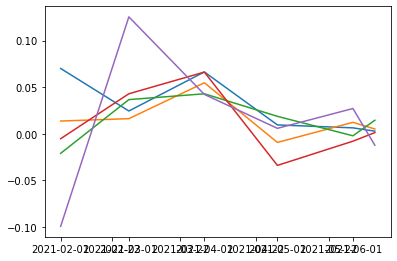

In [29]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(df['Monthly Returns'])
plt.show()

In [30]:
df2 = df[['Monthly Returns', 'Monthly Volume Delta']]
df2

Monthly Returns                                          \
                       XLC       XLK       XLV       XLY       XRT   
Date                                                                 
2021-01-01             NaN       NaN       NaN       NaN       NaN   
2021-02-01        0.070126  0.013651 -0.021038 -0.005308 -0.099420   
2021-03-01        0.024452  0.016222  0.036675  0.042941  0.125536   
2021-04-01        0.066393  0.054784  0.042925  0.066248  0.042265   
2021-05-01        0.009481 -0.009306  0.018709 -0.033982  0.005818   
2021-06-01        0.006346  0.012283 -0.002184 -0.007984  0.027099   
2021-06-10        0.002793  0.005139  0.014514  0.001225 -0.012306   

           Monthly Volume Delta                                          
                            XLC       XLK       XLV       XLY       XRT  
Date                                                                     
2021-01-01                  NaN       NaN       NaN       NaN       NaN  
2021-02-01            -0.294526 -0.107205 -0.064959 -0.257469 -0.550350  
2021-03-01             1.045708  0.964982  0.457706  1.043282  0.221199  
2021-04-01            -0.386876 -0.549903 -0.373049 -0.483243 -0.485733  
2021-05-01             0.186611  0.415546  0.311770  0.409430  0.374252  
2021-06-01            -0.741242 -0.768935 -0.567563 -0.711268 -0.680197  
2021-06-10            -0.958147 -0.935425 -0.950747 -0.948362 -0.916766

In [31]:
df3 = df2['Monthly Returns']
df4 = df2['Monthly Volume Delta']

df3.corr()

,XLC,XLK,XLV,XLY,XRT
XLC,1.000000,0.678660,-0.056422,0.498394,-0.316962
XLK,0.678660,1.000000,0.449569,0.888180,0.233630
XLV,-0.056422,0.449569,1.000000,0.676743,0.802391
XLY,0.498394,0.888180,0.676743,1.000000,0.541692
XRT,-0.316962,0.233630,0.802391,0.541692,1.000000


In [32]:
df4.corr()

,XLC,XLK,XLV,XLY,XRT
XLC,1.000000,0.978249,0.930056,0.990604,0.878867
XLK,0.978249,1.000000,0.966545,0.993531,0.912475
XLV,0.930056,0.966545,1.000000,0.953801,0.928209
XLY,0.990604,0.993531,0.953801,1.000000,0.923514
XRT,0.878867,0.912475,0.928209,0.923514,1.000000
